# Tutorial 1 - set up, run and read SKIRT for radiative transfer calculation
The first step of SIGAME is to run SKIRT in order to derive the interstellar radiation field spectrum locally within each galaxy, and then read the output. Here we generate the input scripts to be executed with the radiative transfer code SKIRT for the set of 3 test galaxies supplied with this version of SIGAME.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Before importing SIGAME!! 
... it's important that we edit the parameter.txt file so sigame knows what to do. in parameter.txt, make sure that the bottom part reads:

BACKEND TASKS<br>
+1 step1_setup_SKIRT<br>
-1 step1_read_SKIRT<br>
-1 step2_grid_gas<br>
-1 step3_setup_Cloudy_grid<br>
-1 step3_run_Cloudy<br>
-1 step3_combine_Cloudy<br>
-1 step3_complete_Cloudy<br>
-1 step3_read_Cloudy_grid<br>
-1 step3_make_Cloudy_table<br>
-1 step4_interpolate<br>
-1 step4_derived_results<br>

### The +1 at step1_setup_SKIRT means that SIGAME will perform this step. Now we can import sigame:

In [2]:
import sigame as si


     
     .oOOOo.  ooOoOOo  .oOOOo.     Oo    Oo      oO o.OOoOoo  
     o     o     O    .O     o    o  O   O O    o o  O        
     O.          o    o          O    o  o  o  O  O  o        
      `OOoo.     O    O         oOooOoOo O   Oo   O  ooOO     
           `O    o    O   .oOOo o      O O        o  O        
            o    O    o.      O O      o o        O  o        
     O.    .O    O     O.    oO o      O o        O  O        
      `oooO'  ooOOoOo   `OooO'  O.     O O        o ooOooOoO  
     
      SImulator of GAlaxy Millimeter/submillimeter Emission
---- A code to simulate the far-IR emission lines of the ISM  ----
------------- in galaxies from hydrodynamical codes --------------
----- for the interpretation and prediction of observations. -----
---- Contact: Karen Olsen, kpolsen (at) protonmail.com (2021) ----


Reading parameter file: [/home/karen/projects/SIGAME/SIGAME/parameters.txt] ... 
will look for skirt input/output data in /home/karen/projects/SIGAME/SIG

In [5]:
si.run()

Filename in global_results._get_file(): 
/home/karen/projects/SIGAME/SIGAME/data/results/z0_3gals_simba_25Mpc_ext_ism_BPASS_arepoPDF_M51

** This is the main controller running SIGAME for the given galaxy sample **
(Number of galaxies in selection: 3 )
OBS: Overwrite is OFF, will not overwrite any existing files

--- Step 1: Create input scripts for the attenuated interstellar radiation field (ISRF) with SKIRT ---
Filename in global_results._get_file(): 
/home/karen/projects/SIGAME/SIGAME/data/results/z0_3gals_simba_25Mpc_ext_ism_BPASS_arepoPDF_M51

- Setting up SKIRT for galaxy # 0 
constructing galaxy...
constructing particle_data object...
particle_data object constructed for G0.

constructing cell_data object...
galaxy G0 constructed.

Loaded file at /home/karen/projects/SIGAME/SIGAME//data/particle_data/z0.00_51_simba_25Mpc.simgas
Loaded file at /home/karen/projects/SIGAME/SIGAME//data/particle_data/z0.00_51_simba_25Mpc.simstar
False
Max age:  13346045100.011877
Min age:  1211072.

A bunch of input ".ski" files should now have been created in the skirt/ folder together with gas and star input files for SKIRT. 
### &#9654; Congratulations ! You have successfully created the input files for SKIRT &#9664;

## Running SKIRT

To install SKIRT v9 go to : https://skirt.ugent.be/version9/_version9.html

Important: For the above generated ".ski" files to run which require the BPASS library, you will need to run the `downloadResources.sh` shell script in the SKIRT git directory as described here: https://skirt.ugent.be/skirt9/class_bpass_s_e_d_family.html

If you are on an HPC cluster with PBS system, you can run SKIRT in parallel with:

`qsub -J 0-N_gal run_skirt.sh`

by editing `run_skirt.sh` a bit to fit your system.

## Read SKIRT output
After running SKIRT we read the output generated with the radiative transfer code SKIRT for the set of 3 test galaxies supplied with this version of SIGAME. This will generate one `cell_data` file per galaxy in `data/cell_data`. 

**In case you could not run SKIRT** on the test galaxies provided, you can download all the relevant SKIRT files at (look for .dat and .fits files starting with `Simba_25Mpc...`):

https://drive.google.com/drive/folders/1vl4nKDOUJ-T2zvUn5I0Otzy_OqakZOSQ?usp=sharing

You can also directly download the finalized `cell_data` files at the following Google drive folder (look for the files ending in `cell_data`) and that way skip the step of reading the SKIRT data:

https://drive.google.com/drive/folders/1vl4nKDOUJ-T2zvUn5I0Otzy_OqakZOSQ?usp=sharing

These files should be moved to the `SIGAME/data/cell_data/` folder where you can safely overwrite the existing files. Due to the size limit of GitHub releases, the full cell_data files are not included in the release itself, and the existing files are only dummies of very small size.

### Before importing SIGAME!! 
... it's important that we edit the parameter.txt file so sigame knows what to do. in parameter.txt, make sure that the bottom part reads:

BACKEND TASKS<br>
-1 step1_setup_SKIRT<br>
+1 step1_read_SKIRT<br>
-1 step2_grid_gas<br>
-1 step3_setup_Cloudy_grid<br>
-1 step3_run_Cloudy<br>
-1 step3_combine_Cloudy<br>
-1 step3_complete_Cloudy<br>
-1 step3_read_Cloudy_grid<br>
-1 step3_make_Cloudy_table<br>
-1 step4_interpolate<br>
-1 step4_derived_results<br>

### The +1 at step1_read_SKIRT means that SIGAME will perform this step. Now we can import sigame:

### The output from running `si.run()` (which you can try to run here if you think you have enough memory, just remember to switch the overwrite parameter in parameters.txt to "yes") should look something like this:

```
Filename in global_results._get_file(): 
/home/u17/karenolsen/SIGAME/data/results/z0_3gals_simba_25Mpc_arepoPDF

** This is the main controller running SIGAME for the given galaxy sample **
(Number of galaxies in selection: 3 )
OBS: Overwrite is ON, will overwrite any existing files

--- Step 1: Read output from SKIRT ---

Now for galaxy # 0
* Read SKIRT output for galaxy # 0
Found no cell data dataframe or "overwrite" is on, starting a new one for galaxy # 0
Creating dataframe with SKIRT cell data output
FIR luminosity: 2.15e+10 Lsun

Done w galaxy # 0

Now for galaxy # 1
* Read SKIRT output for galaxy # 1
Found no cell data dataframe or "overwrite" is on, starting a new one for galaxy # 1
Creating dataframe with SKIRT cell data output
FIR luminosity: 3.27e+10 Lsun

Done w galaxy # 1

Now for galaxy # 2
* Read SKIRT output for galaxy # 2
Found no cell data dataframe or "overwrite" is on, starting a new one for galaxy # 2
Creating dataframe with SKIRT cell data output
FIR luminosity: 6.93e+09 Lsun

Done w galaxy # 2


```

... after that, three ".cell_data" files should now have been created in the data/cell_data/ folder. 

In [3]:
# Try running SIGAME by un-commenting the following lines
# import sigame as si
# si.run()

### &#9654; Congratulations ! You have successfully stored the necessary output from SKIRT &#9664;

## Plots!

With SKIRT output, you can now make a map of FUV emission, important for the local heating, chemistry and level populations.

**Note that this requires the raw SKIRT output files**, either by running SKIRT or by downloading the output files from the above mentioned link.

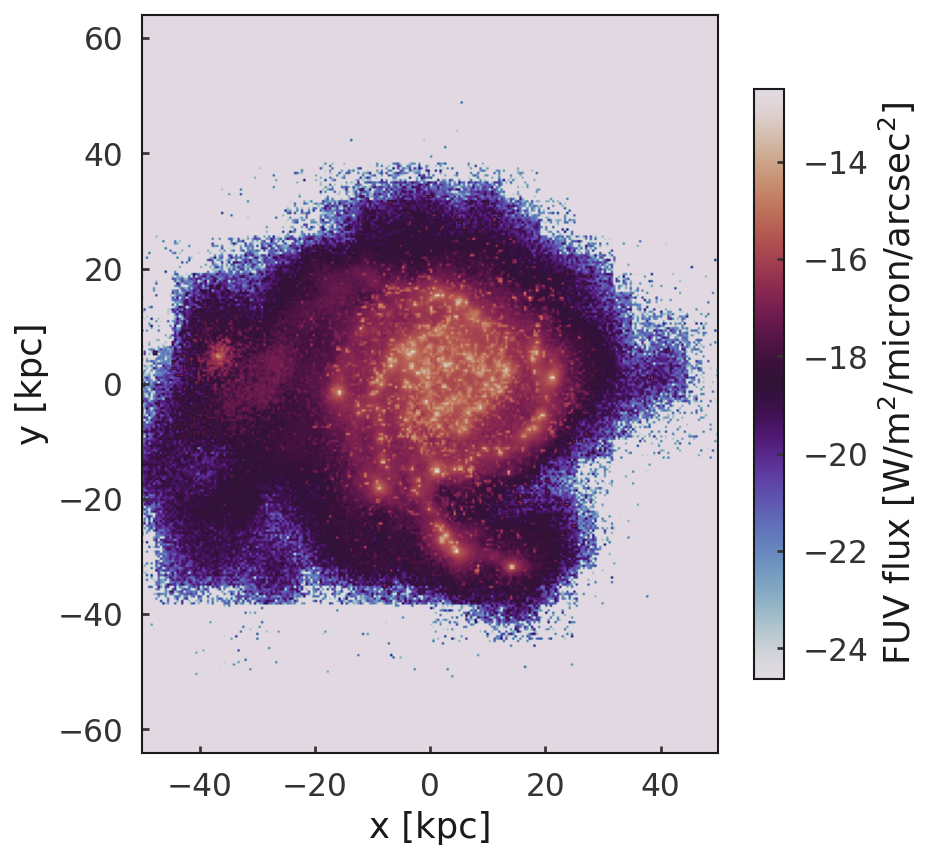

In [6]:
si.plot.FUV_map(gal_index=0,R_max = 50)